[View in Colaboratory](https://colab.research.google.com/github/stoiver/anuga-clinic-2018/blob/master/install_anuga.ipynb)

# CSDMS ANUGA Clinic 2018

## Install ANUGA

Run the following cell to install ANUGA. 

Wait until you see the comment *(5) Ready to go* before proceeding to subsequent commands. 
The install should take less than a minute.

In [1]:
print "(1) Install netcdf nose via pip"
!pip -q install netCDF4 nose  > /dev/null 2>&1 
print "(2) Install gdal via apt-get"
!apt-get -q -y install python-gdal gdal-bin  > /dev/null 2>&1 

print "(3) Download anuga_core github repository"
!git clone --quiet https://github.com/GeoscienceAustralia/anuga_core.git > /dev/null 2>&1  
print "(4) Install anuga"
import os
os.chdir('anuga_core')
!python setup.py --quiet install  > /dev/null 2>&1 
os.chdir('../')
print "(5) Ready to go"

(1) Install netcdf nose via pip
(2) Install gdal via apt-get
(3) Download anuga_core github repository
(4) Install anuga
(5) Ready to go


## Import ANUGA and other libraries into notebook

Allows us access to `anuga` and inline plotting. Also we have a work around to ensure we don't lose output after the inport of `netcdf'.

In [0]:
import sys
stdout = sys.stdout

import anuga
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# NetCDF changes stdout to the terminal
# This resets it
reload(sys)
sys.stdout = stdout

## Create an ANUGA domain

A `domain` is the core object which contains the mesh and the quantities for the particular problem. Here we create a simple rectangular domain. We set the name to `channel1` which will be used when storing the simulation output to a `sww` file called `channel1.sww`.

In [0]:
domain = anuga.rectangular_cross_domain(40, 20, len1=20.0, len2=10.0)
domain.set_name('channel1')

Let's look at the mesh.

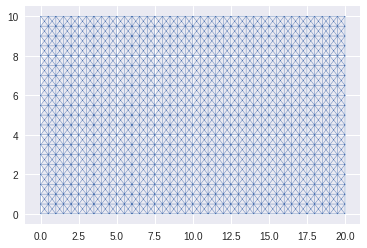

In [4]:
import matplotlib.tri as tri
nodes = domain.nodes
triangles = domain.triangles

#triang = tri.Triangulation(nodes[:,0], nodes[:,1], triangles)

plt.triplot(nodes[:,0], nodes[:,1], triangles, linewidth = 0.4);

We have to setup the values of various quantities associated with the domain. In particular we need to setup the `elevation` the elevation of the bed or the bathymetry. In this case we will do this using a function. 

In [0]:
def topography(x, y):

    z = -x/10

    N = len(x)
    
    minx = np.floor(np.max(x)/4)
    stepx1 = np.min(x[(x >= minx)])
    stepx2 = np.min(x[(x > stepx1 + 0.25)])
    
    minx = np.floor(np.max(x)/2)
    stepx3 = np.min(x[(x >= minx)])
    stepx4 = np.min(x[(x > stepx3 + 0.25)])
    
    minx = np.floor(3*np.max(x)/4)
    stepx5 = np.min(x[(x >= minx)])
    stepx6 = np.min(x[(x > stepx5 + 0.25)])
    
    dist = 0.4 * (np.max(y) - np.min(y))
    
    for i in range(N):
        if stepx1 <= x[i] <= stepx2:
            if (y[i] < dist):
                z[i] += 2
                
        if stepx3 <= x[i] <= stepx4:
            if (y[i] > np.max(y) - dist):
                z[i] += 2
                
        if stepx5 <= x[i] <= stepx6:
            if (y[i] < dist):
                z[i] += 2
            
    return z

Now we set the `elevation`, `stage` and `friction` using the `domain.set_quantity` function. 

In [0]:
domain.set_quantity('elevation', topography, location='centroids') # Use function for elevation
domain.set_quantity('friction', 0.01, location='centroids')        # Constant friction 
domain.set_quantity('stage', expression='elevation', location='centroids') # Dry Bed 

Let's use the `matplotlib` function `tripcolor` to plot the `elevation` quantitiy.  We access the `elevation` quantity using `domain.quantities['elevation']`. 

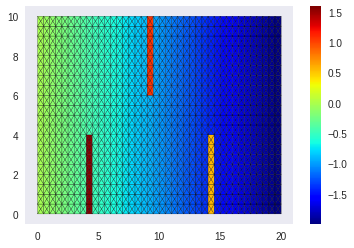

In [12]:
elev = domain.quantities['elevation'].centroid_values
depth = domain.quantities['height'].centroid_values

plt.tripcolor(nodes[:,0], nodes[:,1], triangles, 
              facecolors = elev, 
              edgecolors='k', 
              cmap='jet')
plt.colorbar();


In [0]:
Bi = anuga.Dirichlet_boundary([0.4, 0, 0])         # Inflow
Bo = anuga.Dirichlet_boundary([-2, 0, 0])          # Inflow
Br = anuga.Reflective_boundary(domain)             # Solid reflective wall

domain.set_boundary({'left': Bi, 'right': Bo, 'top': Br, 'bottom': Br})

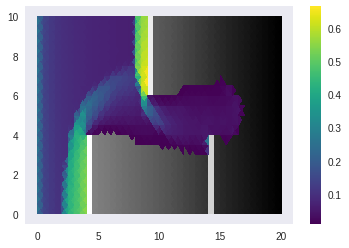

Time = 45.0000, delta t in [0.01509080, 0.03749219], steps=281 (84s)


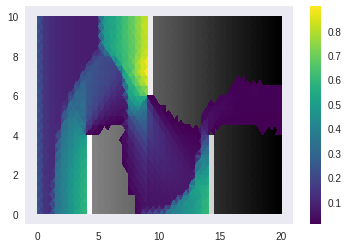

Time = 50.0000, delta t in [0.01510723, 0.01595556], steps=322 (0s)


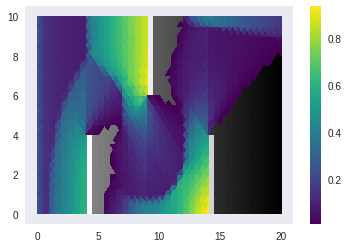

Time = 55.0000, delta t in [0.01401606, 0.01510256], steps=346 (0s)


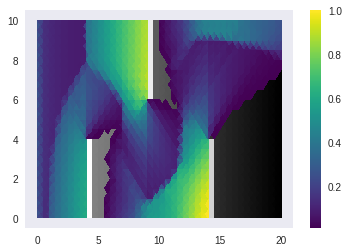

Time = 60.0000, delta t in [0.01356452, 0.01401486], steps=363 (1s)


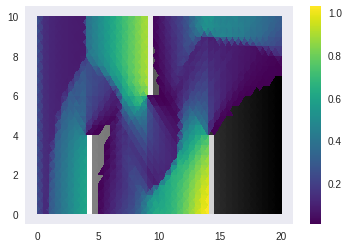

Time = 65.0000, delta t in [0.01304530, 0.01356421], steps=377 (1s)


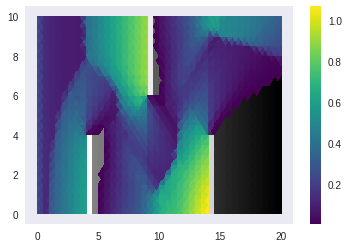

Time = 70.0000, delta t in [0.01273881, 0.01305885], steps=388 (1s)


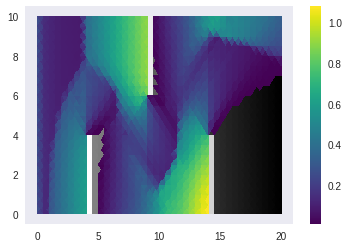

Time = 75.0000, delta t in [0.01258548, 0.01273877], steps=396 (1s)


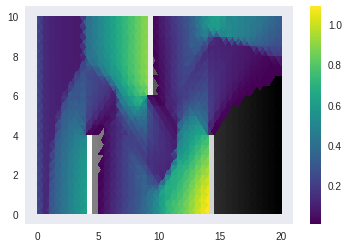

Time = 80.0000, delta t in [0.01251472, 0.01259362], steps=399 (1s)


In [14]:
x = domain.quantities['x'].centroid_values
y = domain.quantities['y'].centroid_values
triang = tri.Triangulation(nodes[:,0], nodes[:,1], triangles)

for t in domain.evolve(yieldstep=5, duration=40):
  
    plt.figure()

    triang.set_mask(depth>0.01)
    plt.tripcolor(triang, 
              facecolors = elev,
              cmap='Greys_r')
    
    triang.set_mask(depth<0.01)
    plt.tripcolor(triang, 
              facecolors = depth,
              cmap='viridis')

    plt.colorbar()
    plt.show()
    
    domain.print_timestepping_statistics()
    

  